# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Abhinav Kompella**

**Graduate / Undergraduate: Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [2]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)

For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [3]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [4]:
##### Code block for Question 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234, test_size=0.2)

# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [5]:
##### Code block for Question 2
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train, y_train, test_size=1/3, random_state=3456)
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train, y_train, test_size=1/3, random_state=5678)
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train, y_train, test_size=1/3, random_state=7890)

# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [6]:
##### Code block for Question 3
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def pipe(X_train, X_test, y_train, y_test):
  model_pipeline = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))
  svm_poly = svm.SVC(kernel='poly')
  svm_rbf = svm.SVC(kernel='rbf')

  model_pipeline.fit(X_train, y_train)
  svm_poly.fit(X_train, y_train)
  svm_rbf.fit(X_train, y_train)  

  y_pred_linear = model_pipeline.predict(X_test)
  y_pred_poly = svm_poly.predict(X_test)
  y_pred_rbf = svm_rbf.predict(X_test)

  mse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
  mse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
  mse_rbf = np.sqrt(mean_squared_error(y_test, y_pred_rbf))

  # Classification report
  print("Classification report for Linear SVM:")
  print(classification_report(y_test, y_pred_linear))
  learn_curve(model_pipeline, X_train, y_train)

  print("Classification report for Poly SVM:")
  print(classification_report(y_test, y_pred_poly))
  learn_curve(svm_poly, X_train, y_train)

  print("Classification report for rbf SVM:")
  print(classification_report(y_test, y_pred_rbf))
  learn_curve(svm_rbf, X_train, y_train)

  return [mse_linear, mse_poly, mse_rbf]

def learn_curve(model, X_train, y_train):
  train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], scoring='neg_mean_squared_error')

  # Compute the mean training and test scores across folds
  train_scores_mean = -train_scores.mean(axis = 1)
  validation_scores_mean = -validation_scores.mean(axis = 1)

  # Plot the learning curve
  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes, train_scores_mean, label='Training score')
  plt.plot(train_sizes, validation_scores_mean, label='Cross-validation score')
  plt.title('Learning Curve')
  plt.xlabel('Number of training examples')
  plt.ylabel('Score')
  plt.legend(loc='best')
  plt.show()

# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Classification report for Linear SVM:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2651
           1       0.66      0.62      0.64      2698

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



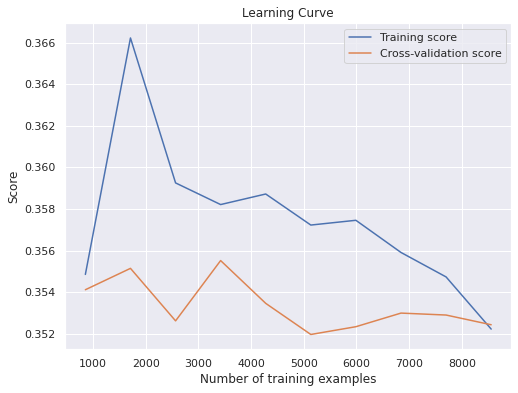

Classification report for Poly SVM:
              precision    recall  f1-score   support

           0       0.74      0.26      0.39      2651
           1       0.56      0.91      0.69      2698

    accuracy                           0.59      5349
   macro avg       0.65      0.59      0.54      5349
weighted avg       0.65      0.59      0.54      5349



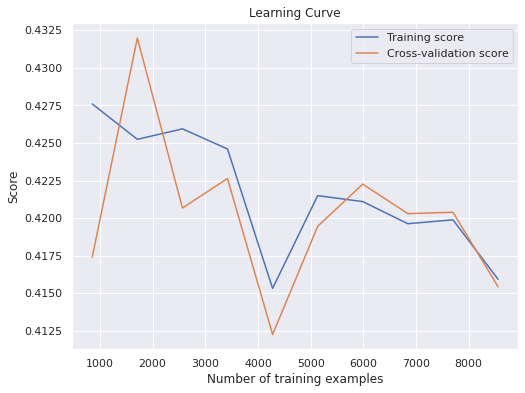

Classification report for rbf SVM:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2651
           1       0.66      0.62      0.64      2698

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



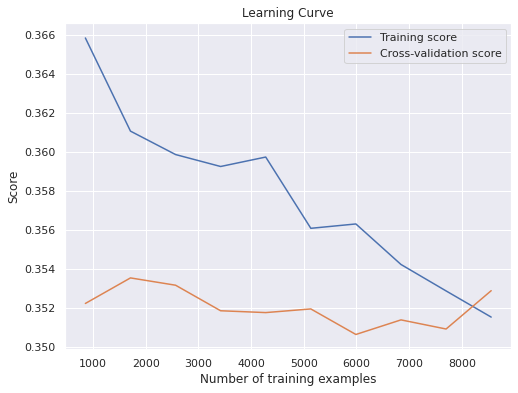

In [7]:
fold1_linear, fold1_poly, fold1_rbf = pipe(X_train_1, X_val_1, y_train_1, y_val_1)



1.   The learning curves for linear and rbf kernels seem better as their learning rate is fairly getting better with number of training examples.
2.   The classification report also tells something similar where the accuracy for poly kernel is lesser than the other two.
3.   The average for Precision and recall seems to be almost same for all the models except recall is a bit lesser in the poly. This shows how much impact recall has on the model.



# Question 5 (70 points)

FOLD 2 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Classification report for Linear SVM:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2708
           1       0.65      0.64      0.64      2641

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



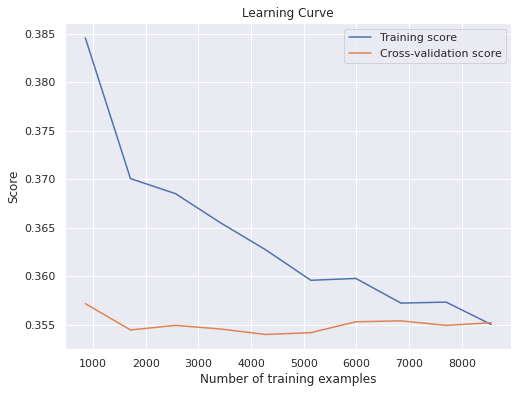

Classification report for Poly SVM:
              precision    recall  f1-score   support

           0       0.77      0.23      0.35      2708
           1       0.54      0.93      0.68      2641

    accuracy                           0.57      5349
   macro avg       0.65      0.58      0.52      5349
weighted avg       0.65      0.57      0.51      5349



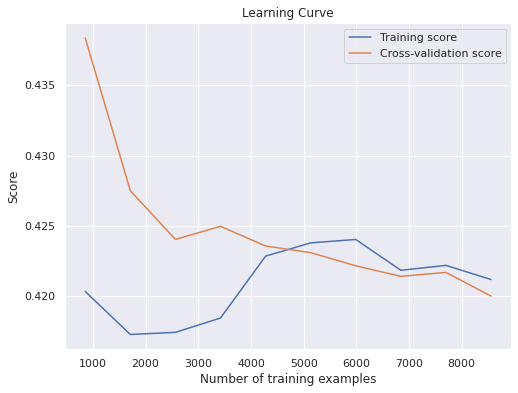

Classification report for rbf SVM:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      2708
           1       0.65      0.64      0.64      2641

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



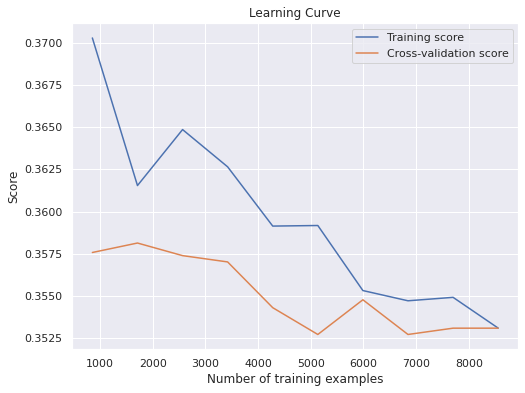

In [9]:
##### Code block for Question 5
fold2_linear, fold2_poly, fold2_rbf = pipe(X_train_2, X_val_2, y_train_2, y_val_2)

1.   The learning curves for linear and rbf kernels seem better as their learning rate is fairly getting better with number of training examples. The poly two scores in poly curve is intersecting at a point and it keeps going up. This may indicate towards overfitting.
2.   The classification report also tells something similar where the accuracy for poly kernel is lesser than the other two.
3.   The average for Precision and recall seems to be almost same for all the models except recall and precision is very much different for poly. This shows how much impact recall has on the model.



# Question 6 (70 points)

FOLD 3 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Classification report for Linear SVM:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2684
           1       0.65      0.62      0.64      2665

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



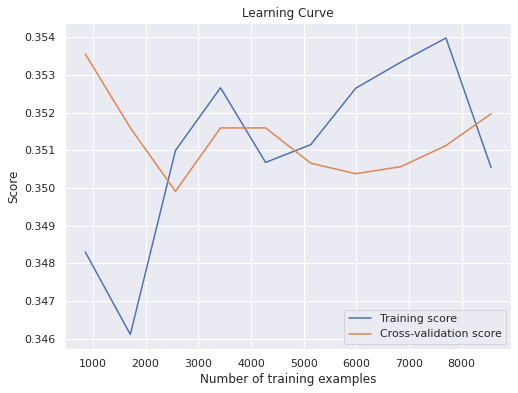

Classification report for Poly SVM:
              precision    recall  f1-score   support

           0       0.74      0.24      0.36      2684
           1       0.54      0.91      0.68      2665

    accuracy                           0.58      5349
   macro avg       0.64      0.58      0.52      5349
weighted avg       0.64      0.58      0.52      5349



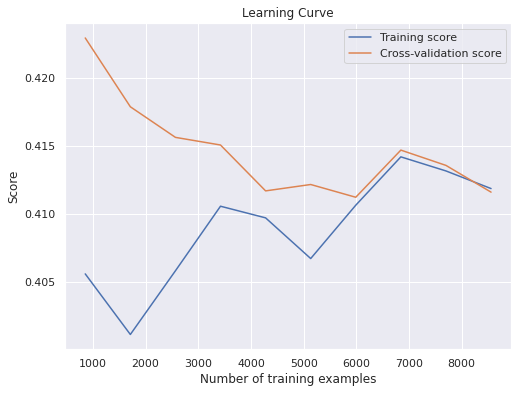

Classification report for rbf SVM:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2684
           1       0.64      0.62      0.63      2665

    accuracy                           0.64      5349
   macro avg       0.64      0.64      0.64      5349
weighted avg       0.64      0.64      0.64      5349



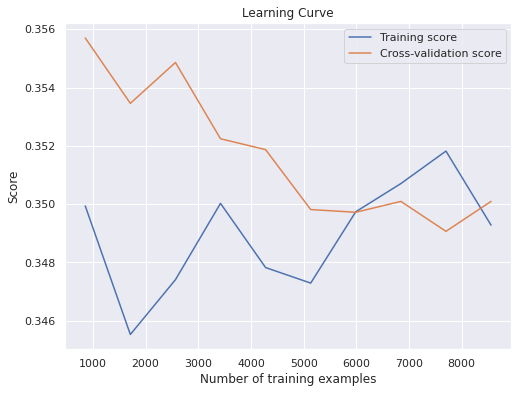

In [14]:
##### Code block for Question 6
fold3_linear, fold3_poly, fold3_rb = pipe(X_train_3, X_val_3, y_train_3, y_val_3)



1.   The learning curves for linear and rbf kernels are very much worse in this third fold for some reasonas their learning rate is fluctuating a lot with number of training examples. The poly curve is very nice in this case with the curve being almost perfect.
2.   The classification report also tells something totally different here becayse the accuracy for poly kernel is lesser than the other two. But the learning curve is better.
3.   The average for Precision and recall seems to be almost same for all the models except recall and precision is very much different for poly. This shows how much impact recall has on the model.



# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [15]:
##### Code block for Question 7

data = {'Kernel': ['Linear', 'Poly', 'RBF'],
        'Accuracy': [0.65, 0.58, 0.65],
        'Precision': [0.65, 0.64, 0.65],
        'Recall': [0.65, 0.58, 0.65],
        'F1-score': [0.64, 0.52, 0.65],
        'RMSE': [fold2_linear.round(2), fold3_poly.round(2), fold2_rbf.round(2)]}
  
# Create the pandas DataFrame
df = pd.DataFrame(data, index=data['Kernel'])

df

,Kernel,Accuracy,Precision,Recall,F1-score,RMSE
Linear,Linear,0.65,0.65,0.65,0.64,0.59
Poly,Poly,0.58,0.64,0.58,0.52,0.65
RBF,RBF,0.65,0.65,0.65,0.65,0.59


# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

From the metrics, we can say that the Linear kernel or the RBF kernel would be a good option. Their metrics are almost the same and they have been giving a consistent values for 3 folds. I would say poly would be more better option because the values will not have to be scaled. For linear kernel the values had to be scaled or it took hours for it to run.

If I have to select a model purly by looking at learning curves, it would be the Linear model. The curves have been pretty consistant for all the folds. The train was low most of the time and the validation error decreased significantly in the first few iterations.

# Question 9 (50 points)

Wrie the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from quetsion 7 directly from this pipeline.

In [16]:
##### Code block for Question 9

def pipe(X_train, X_test, y_train, y_test):
  model_pipeline = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))
  svm_poly = svm.SVC(kernel='poly')
  svm_rbf = svm.SVC(kernel='rbf')

  model_pipeline.fit(X_train, y_train)
  svm_poly.fit(X_train, y_train)
  svm_rbf.fit(X_train, y_train)  

  y_pred_linear = model_pipeline.predict(X_test)
  y_pred_poly = svm_poly.predict(X_test)
  y_pred_rbf = svm_rbf.predict(X_test)

  mse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
  mse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
  mse_rbf = np.sqrt(mean_squared_error(y_test, y_pred_rbf))

  # Classification report
  print("Classification report for Linear SVM:")
  print(classification_report(y_test, y_pred_linear))
  learn_curve(model_pipeline, X_train, y_train)

  print("Classification report for Poly SVM:")
  print(classification_report(y_test, y_pred_poly))
  learn_curve(svm_poly, X_train, y_train)

  print("Classification report for rbf SVM:")
  print(classification_report(y_test, y_pred_rbf))
  learn_curve(svm_rbf, X_train, y_train)

  return [mse_linear, mse_poly, mse_rbf]

def learn_curve(model, X_train, y_train):
  train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], scoring='neg_mean_squared_error')

  # Compute the mean training and test scores across folds
  train_scores_mean = -train_scores.mean(axis = 1)
  validation_scores_mean = -validation_scores.mean(axis = 1)

  # Plot the learning curve
  plt.figure(figsize=(8, 6))
  plt.plot(train_sizes, train_scores_mean, label='Training score')
  plt.plot(train_sizes, validation_scores_mean, label='Cross-validation score')
  plt.title('Learning Curve')
  plt.xlabel('Number of training examples')
  plt.ylabel('Score')
  plt.legend(loc='best')
  plt.show()

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [17]:
def Plot_3D(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test, 
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()

In [ ]:
##### Code block for Graduate Student Question - Figure 3
